# Preprocessing: PART IV

**INPUT: _filt_events.fif files**

1. Requires MANUAL check for BAD segments
-> **OUTPUT: _filt_clean.fif file**
2. Runs ICA
    -> **OUTPUT: _ica.fif file AND components figures**
3. Applies ICA
    -> **OUTPUT: _reconst.fif file** - FINAL FILE

**PREPROCESSING FINISHED!**

In [43]:
import mne
import os
from utils import check_paths
import numpy as np
import pandas as pd
import pickle
from mne.preprocessing import ICA

import matplotlib.pyplot as plt
%matplotlib qt

In [18]:
# set EEG data path, group, task and subject
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'O'
sub_name = 's1_pac_sub48' # specify the subject you want to analyse 's1_pac_sub52'

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(preproc_dir, 'filt')
ica_dir = os.path.join(preproc_dir, 'ICA')


Manual check for BAD segments - run for SINGLE subs

In [5]:
# MANUAL CHECK: mark noisy segments (one sub at a time) - hit A, pick BADS and mark the segments.
#! Close the menu first, then close the plot

# MAIN

tasks = ['_MAIN'] #! Remove when BL is preprocessed ['_BL', '_MAIN']

for task in tasks:
    eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_events.fif')

    raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)

    # Open events from pickle file
    with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
        events = pickle.load(pickle_file)

    # MANUAL CHECK: mark noisy segments
    raw_filt_eve.plot(block=True, events=events[0], n_channels=64)
    plt.show()  # Blocks execution until the plot window is closed

    # save filtered file
    raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)
    print(f'{sub_name}{task} is CLEAN')


Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_MAIN_filt_events.fif...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\2135097632.py:11: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_MAIN_filt_events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1991855 =      0.000 ...  3983.710 secs
Ready.
Reading 0 ... 1991855  =      0.000 ...  3983.710 secs...
Channels marked as bad:
none
Writing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_MAIN_filt_clean.fif


C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\2135097632.py:22: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_MAIN_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)


Closing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_MAIN_filt_clean.fif
[done]
s1_pac_sub54_MAIN is CLEAN


In [ ]:
subs = ['s1_pac_sub43', 's1_pac_sub58', 's1_pac_sub59',
        's1_pac_sub61', 's1_pac_sub63', 's1_pac_sub64',
        's1_pac_sub67', 's1_pac_sub71', 's1_pac_sub72',
        's1_pac_sub76', 's1_pac_sub77']

In [6]:
# MANUAL CHECK: mark noisy segments (one sub at a time) - hit A, pick BADS and mark the segments.
#! Close the menu first, then close the plot

# BL

eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'O'
subs_dir = os.path.join(eeg_data_dir, group)

tasks = ['_BL'] #! Remove when BL is preprocessed ['_BL', '_MAIN']

for sub_name in ['s1_pac_sub53', 's1_pac_sub54']: # os.listdir(subs_dir) OR ['s1_pac_sub00']
    
    print(f'Processing {sub_name}...')

    preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
    filt_dir = os.path.join(subs_dir, sub_name, 'preproc', 'filt')

    for task in tasks:
        eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_events.fif')

        raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)

        # Open events from pickle file
        with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
            events = pickle.load(pickle_file)

        # MANUAL CHECK: mark noisy segments
        raw_filt_eve.plot(block=True, events=events[0], n_channels=64)
        plt.show()  # Blocks execution until the plot window is closed

        # save filtered file
        raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)
        print(f'{sub_name}{task} is CLEAN')
        

Processing s1_pac_sub53...
Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub53\preproc\filt\s1_pac_sub53_BL_filt_events.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 171221 =      0.000 ...   342.442 secs
Ready.
Reading 0 ... 171221  =      0.000 ...   342.442 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\1873249471.py:22: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub53\preproc\filt\s1_pac_sub53_BL_filt_events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)


Channels marked as bad:
none
Writing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub53\preproc\filt\s1_pac_sub53_BL_filt_clean.fif
Closing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub53\preproc\filt\s1_pac_sub53_BL_filt_clean.fif
[done]
s1_pac_sub53_BL is CLEAN
Processing s1_pac_sub54...
Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_BL_filt_events.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 164539 =      0.000 ...   329.078 secs
Ready.
Reading 0 ... 164539  =      0.000 ...   329.078 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\1873249471.py:33: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub53\preproc\filt\s1_pac_sub53_BL_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\1873249471.py:22: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_BL_filt_events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve = mne.io

Channels marked as bad:
none
Writing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_BL_filt_clean.fif
Closing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_BL_filt_clean.fif
[done]
s1_pac_sub54_BL is CLEAN


C:\Users\a1902989\AppData\Local\Temp\ipykernel_20764\1873249471.py:33: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub54\preproc\filt\s1_pac_sub54_BL_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)


CHECK ANNOTATIONS

In [ ]:
# sub_name = 's1_pac_sub10'
# preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
# filt_dir = os.path.join(preproc_dir, 'filt')

# # Open events from pickle file
# with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
#     events = pickle.load(pickle_file)

eeg_data_path_check = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')

raw_filt_check = mne.io.read_raw_fif(eeg_data_path_check, preload=True)
raw_filt_check.plot(events=events[0], n_channels=64)

ICA - run GROUP analysis

Run only after manual cleaning of all the recordings!

In [7]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'O'
subs_dir = os.path.join(eeg_data_dir, group)
print(os.listdir(subs_dir))

['s1_pac_sub12', 's1_pac_sub13', 's1_pac_sub14', 's1_pac_sub15', 's1_pac_sub17', 's1_pac_sub20', 's1_pac_sub21', 's1_pac_sub23', 's1_pac_sub34', 's1_pac_sub35', 's1_pac_sub36', 's1_pac_sub39', 's1_pac_sub40', 's1_pac_sub41', 's1_pac_sub45', 's1_pac_sub47', 's1_pac_sub48', 's1_pac_sub49', 's1_pac_sub50', 's1_pac_sub51', 's1_pac_sub53', 's1_pac_sub54', 's1_pac_sub55', 's1_pac_sub56', 's1_pac_sub60', 's1_pac_sub62', 's1_pac_sub68', 's1_pac_sub69']


In [ ]:
# ICA
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'O'
subs_dir = os.path.join(eeg_data_dir, group)

tasks = ['_MAIN'] # ['_BL', '_MAIN']

for sub_name in ['s1_pac_sub48']: # os.listdir(subs_dir) OR ['s1_pac_sub00']
    
    print(f'Processing {sub_name}...')

    preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
    filt_dir = os.path.join(subs_dir, sub_name, 'preproc', 'filt')

    # create a directory for ICA files
    ica_dir = os.path.join(preproc_dir, 'ICA')
    check_paths(ica_dir)

    for task in tasks:

        eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')
        raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)

        # apply ICA
        ica = ICA(n_components=None, max_iter="auto")
        ica.fit(raw_filt_eve)

        # plot and save the ICA components
        fig_components = ica.plot_components()

        for i, fig in enumerate(fig_components):
            fig.savefig(os.path.join(ica_dir, f'{sub_name}{task}_ica_components_{i}.png'))
            plt.close(fig)  # Close the figure after saving to avoid display

        ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica.fif'), overwrite=True)


ICA - Manual check for BAD components - run for SINGLE subs

In [ ]:
# MANUAL CHECK: pick ICA components to exclude
# When ICA sources are plotted, look at the ICA topography in parallel to decide which ICA components to exclude
# TO EXCLUDE A COMPONENT: right-click on it (should turn grey) -> close the figure -> check after saving

eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'O'
subs_dir = os.path.join(eeg_data_dir, group)

task = '_MAIN' # ['_BL', '_MAIN']
sub_name = 's1_pac_sub48' # specify the subject you want to analyse

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc', 'filt')
ica_dir = os.path.join(preproc_dir, 'ICA')
analysis_dir = os.path.join(preproc_dir, 'analysis')
check_paths(analysis_dir)

eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')
ica_path = os.path.join(ica_dir, f'{sub_name}{task}_ica.fif')

reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
ica = mne.preprocessing.read_ica(ica_path)

# plot ICA sources
ica.plot_components(nrows=6, ncols=10)
ica.plot_sources(reconst_raw)
plt.show()


Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\filt\s1_pac_sub48_MAIN_filt_clean.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 2031022 =      0.000 ...  4062.044 secs
Ready.
Reading 0 ... 2031022  =      0.000 ...  4062.044 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_29004\156464384.py:21: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\filt\s1_pac_sub48_MAIN_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)


Reading D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\ICA\s1_pac_sub48_MAIN_ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
Now restoring ICA solution ...
Ready.
Creating RawArray with float64 data, n_channels=59, n_times=2031023
    Range : 0 ... 2031022 =      0.000 ...  4062.044 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1271 matching events found
No baseline correction applied
0 projection it

In [51]:
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (59 components)
    Zeroing out 12 ICA components
    Projecting back using 60 PCA components


<Raw | s1_pac_sub48_MAIN_filt_clean.fif, 61 x 2031023 (4062.0 s), ~945.3 MB, data loaded>

Creating RawArray with float64 data, n_channels=59, n_times=2031023
    Range : 0 ... 2031022 =      0.000 ...  4062.044 secs
Ready.


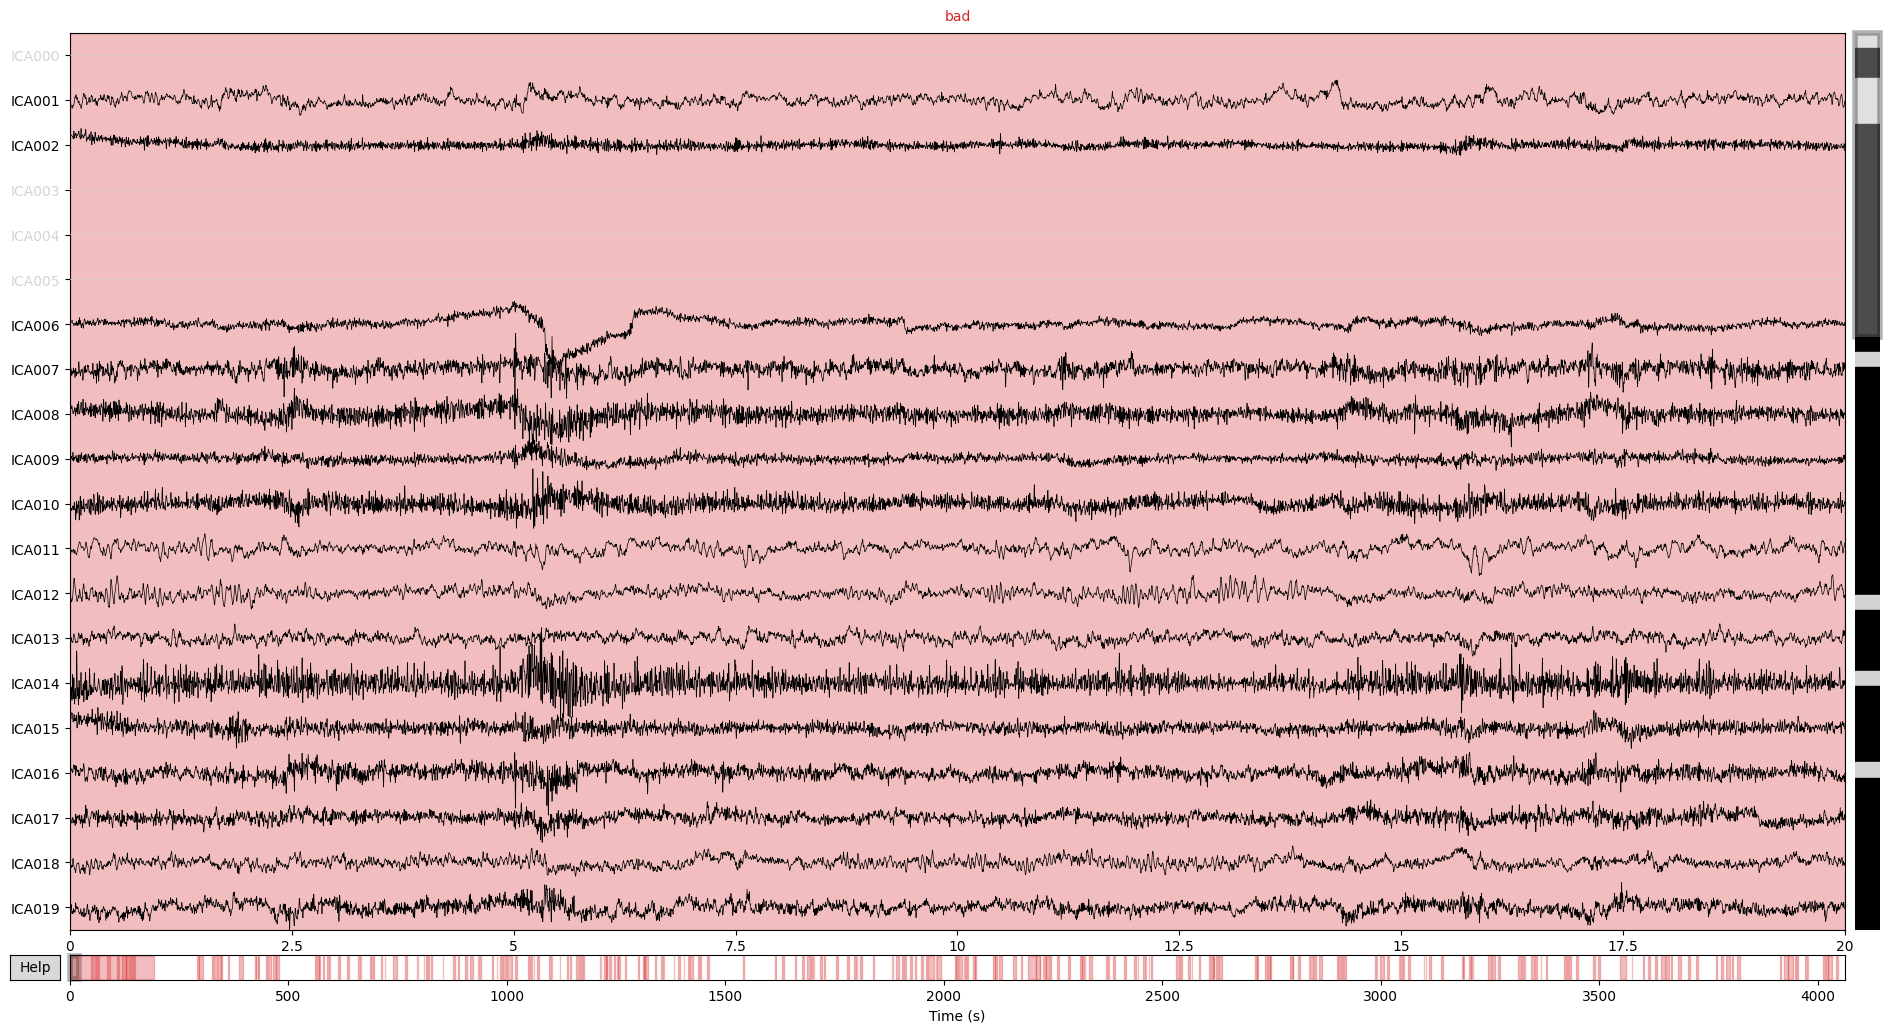

In [50]:
ica.plot_sources(reconst_raw)

In [52]:
reconst_raw.plot(n_channels=64)

# save ICA with excluded components and reconstructed file
ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica_excl.fif'), overwrite=True)
reconst_raw.save(os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif'), overwrite=True) # FINAL FILE

Overwriting existing file.
Writing ICA solution to D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\ICA\s1_pac_sub48_MAIN_ica_excl.fif...
Overwriting existing file.
Writing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\analysis\s1_pac_sub48_MAIN_reconst.fif


C:\Users\a1902989\AppData\Local\Temp\ipykernel_29004\3412089378.py:4: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\ICA\s1_pac_sub48_MAIN_ica_excl.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica_excl.fif'), overwrite=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_29004\3412089378.py:5: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\analysis\s1_pac_sub48_MAIN_reconst.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw.save(os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif'), overwrite=True) # FINAL FILE


Closing D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub48\preproc\analysis\s1_pac_sub48_MAIN_reconst.fif
[done]


Channels marked as bad:
none


SANITY CHECK

In [ ]:
# 1
# Open events from pickle file
with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
    events = pickle.load(pickle_file)

# before ICA
raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
raw.plot(events=events[0], n_channels=64)

# after ICA
reconst_raw.plot(events=events[0], n_channels=64)

Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub15\preproc\analysis\s1_pac_sub15_MAIN_reconst.fif...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_29004\2702401996.py:11: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\O\s1_pac_sub15\preproc\analysis\s1_pac_sub15_MAIN_reconst.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1963511 =      0.000 ...  3927.022 secs
Ready.
Reading 0 ... 1963511  =      0.000 ...  3927.022 secs...


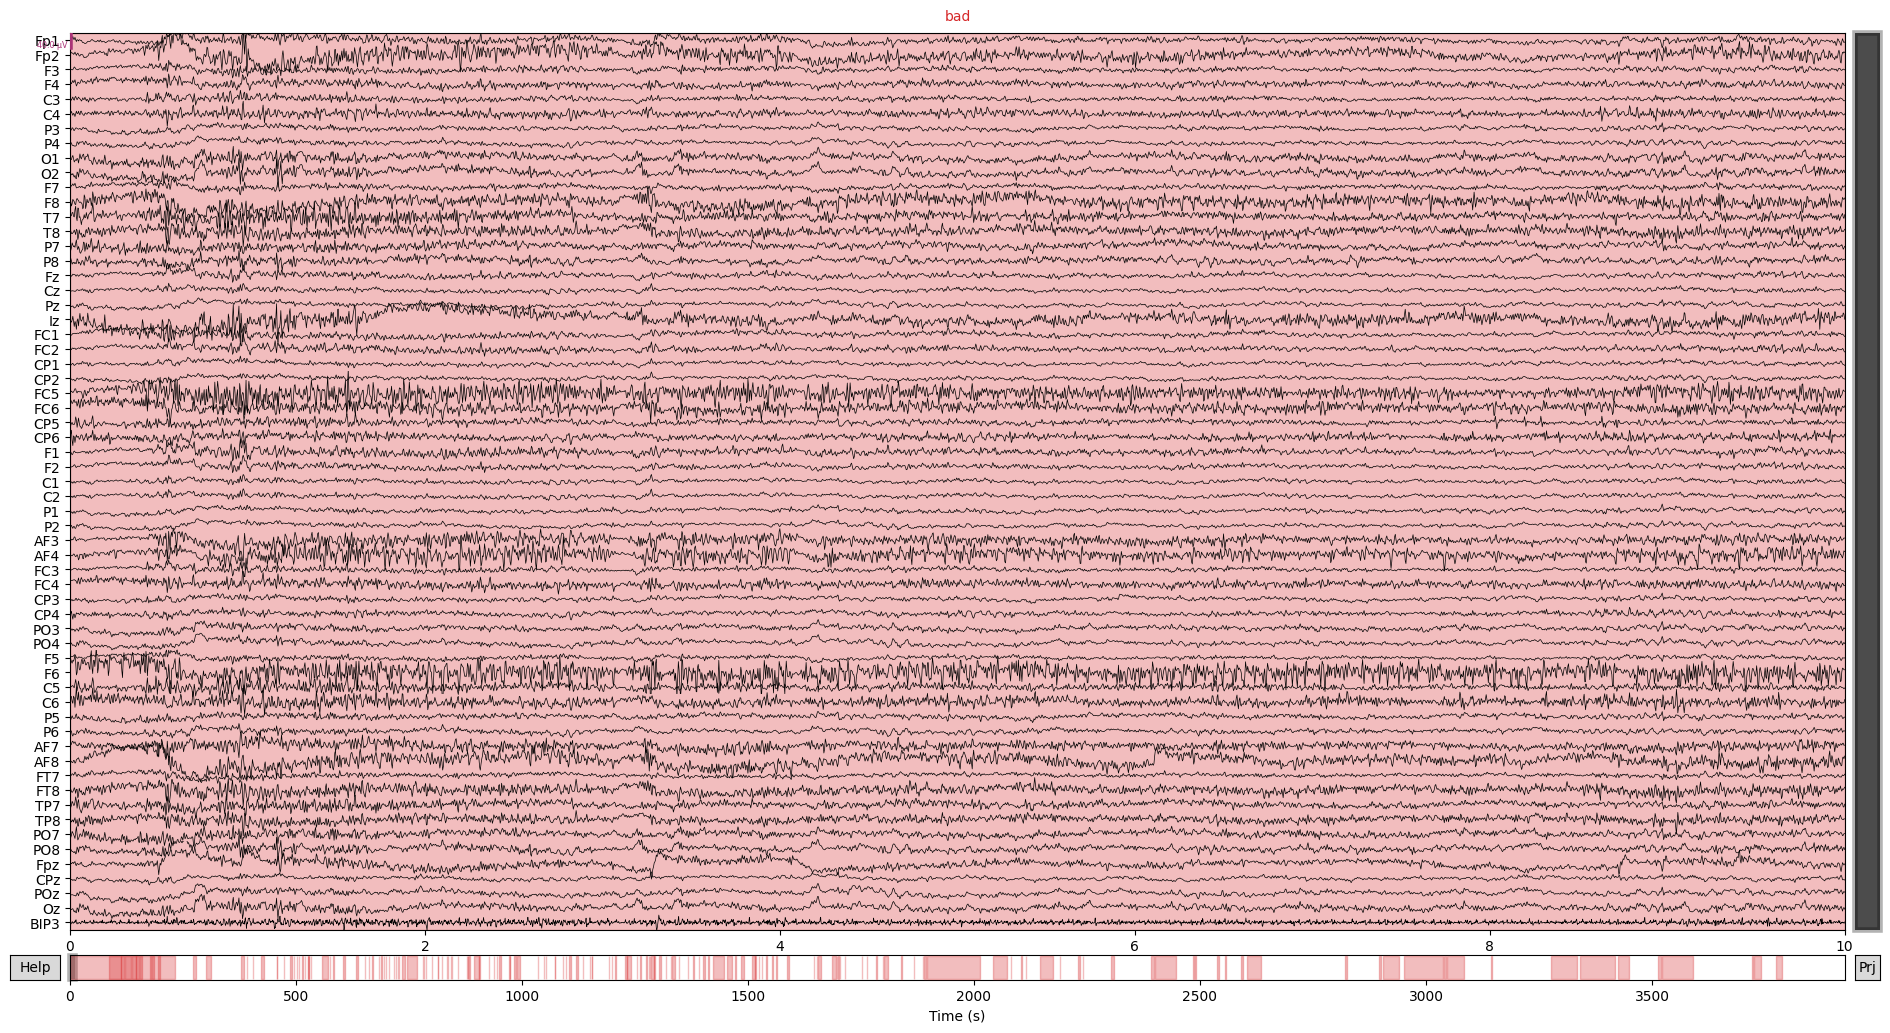

Channels marked as bad:
none


In [59]:
# 2
sub_name = 's1_pac_sub15'
task = '_MAIN' # ['_BL', '_MAIN']
group = 'O'

eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
subs_dir = os.path.join(eeg_data_dir, group)
preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
analysis_dir = os.path.join(preproc_dir, 'analysis')
eeg_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif')
reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
reconst_raw.plot(n_channels=64)